In [15]:
import pandas as pd
import numpy as np
from pandas import Timedelta
from datetime import timedelta

In [16]:
df = pd.read_pickle("../seatunnel.pkl")
df = df.drop_duplicates()

In [17]:
df['total_time'][0:30].median()

Timedelta('3 days 01:27:48')

In [18]:
df['total_time'] = pd.to_datetime(df['end_time']) - pd.to_datetime(df['begin_time'])

In [19]:
df['total_time'] < timedelta(minutes=3)

0       False
1       False
2       False
3       False
4       False
        ...  
5215    False
5216    False
5217    False
5218    False
5219    False
Name: total_time, Length: 5208, dtype: bool

In [20]:
df['time_binary'] = df['total_time'].apply(lambda x:  0 if x < timedelta (days = 3) else 1)

In [21]:
X = df.loc[:, ~df.columns.isin(['time_binary', 'total_time' ,'begin_sha', 'end_sha', 'begin_time' , 'begin_key', 'begin_revision', 'end_time', 'end_key', 'end_revision'])]
y = df['time_binary']

In [22]:
X_train, X_test = X[:int(0.7 * len(X))], X[int(0.7 * len(X)):]
y_train, y_test = y[:int(0.7 * len(X))], y[int(0.7 * len(X)):]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.060641906223023345


In [25]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.07894774571238017


Text(0, 0.5, 'NNLS regression coefficients')

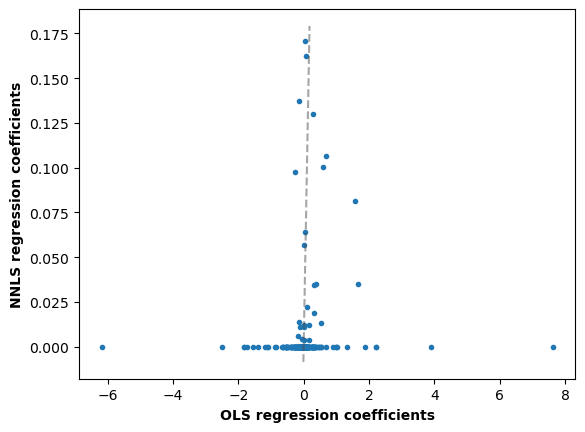

In [26]:
import matplotlib.pyplot as plt
ig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")